# Extracted spectra

## Notebook setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import glob as glob
import matplotlib as mpl
import matplotlib.patheffects as PathEffects
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import numpy as np
import pandas as pd
import seaborn as sns

import bz2
import corner
import json
import pathlib
import pickle
import utils
import warnings

from astropy import constants as const
from astropy import units as uni
from astropy.io import ascii, fits
from astropy.time import Time
from mpl_toolkits.axes_grid1 import ImageGrid

# Default figure dimensions
FIG_WIDE = (11, 5)
FIG_LARGE = (8, 11)

# Figure style
sns.set(style="ticks", palette="colorblind", color_codes=True, context="talk")
params = utils.plot_params()
plt.rcParams.update(params)

## [Dowload data](https://www.dropbox.com/sh/f6rqfis0rdd0w1r/AAADJF0JI-YEx1cS9oCiwKP6a?dl=1)

Unzip this into a folder named `data` in the same level as this notebook

## Load

In [4]:
data_dir = "data/extracted_spectra"

wavs_d, wavs_u = np.genfromtxt(f"{data_dir}/hp23_bins.dat", unpack=True)

fpaths = sorted(glob.glob(f"{data_dir}/ut*/LC*.pbz2"))
data_dict = {
    f"Transit {i}": utils.decompress_pickle(fpath)
    for (i, fpath) in enumerate(fpaths, start=1)
}

## Plot

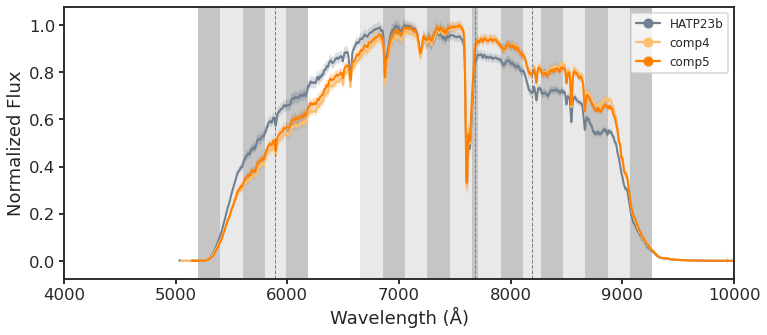

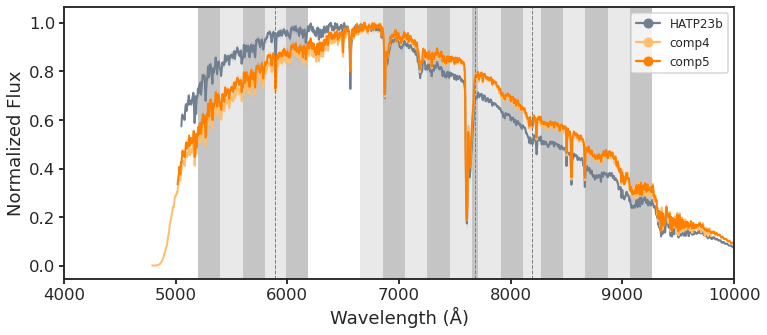

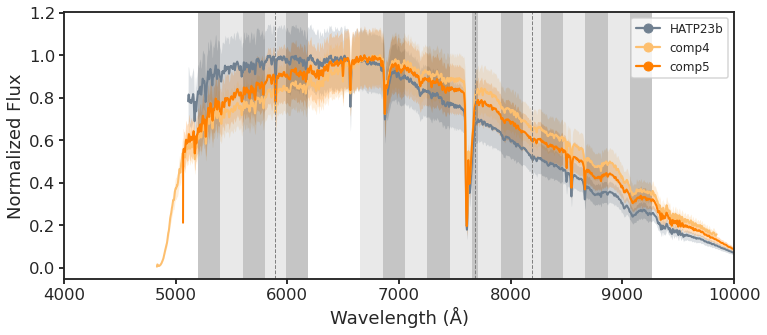

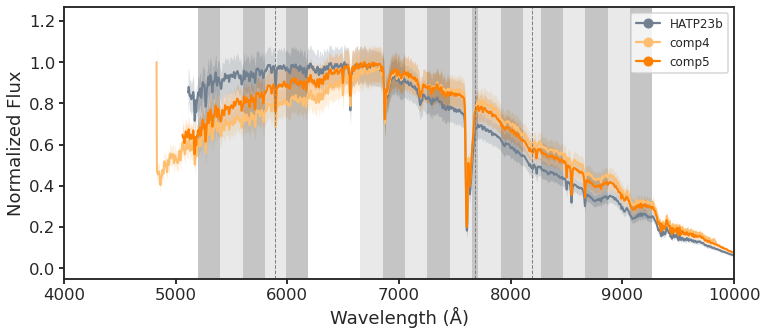

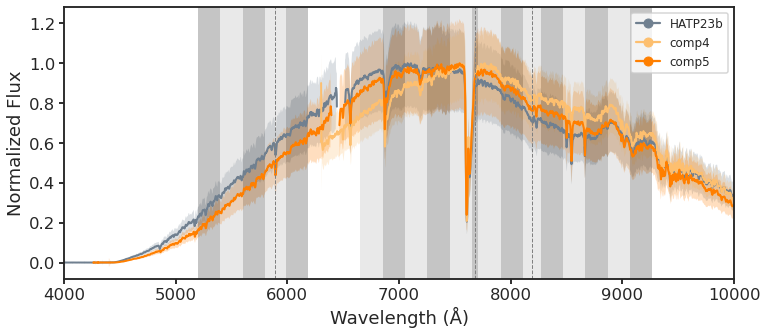

In [5]:
object_names = ["HATP23b", "comp4", "comp5"]
for transit, data in data_dict.items():
    spec = data["spectra"]
    wavs = spec["wavelengths"]

    fig, ax = plt.subplots(figsize=FIG_WIDE)
    c = "darkgrey"
    for name, data in sorted(spec.items()):
        if name in "HATP23b":
            median_kwargs = {"c": "C8"}
        else:
            median_kwargs = None
            c = "grey"
        if name in object_names:
            p, wav, flux = utils.plot_spec_file(
                ax,
                data=data,
                wavs=wavs,
                label=name,
                median_kwargs=median_kwargs,
                # fill_kwargs=fill_kwargs,
            )
    ax.legend(loc=1, fontsize=12)

    # Bins
    for i, (w_d, w_u) in enumerate(zip(wavs_d, wavs_u)):
        c = "k" if i % 2 == 0 else "darkgrey"
        ax.axvspan(w_d, w_u, alpha=0.25, color=c, lw=0)

    # Species
    species = {"Na I-D": 5892.9, "K I_avg": 7682.0, "Na I-8200_avg": 8189.0}
    [ax.axvline(wav, ls="--", lw=1, color="grey") for name, wav in species.items()]


    # Save
    title = transit
    ax.set_xlabel("Wavelength (Å)")
    ax.set_ylabel("Normalized Flux")
    # ax.set_title(title)
    ax.set_xlim(4_000, 10_000)
    title = title.lower().replace(" ", "_") + "_extr_spec"
    fig.tight_layout()
    fig.set_size_inches(FIG_WIDE)
    utils.savefig(f"../paper/figures/extracted_spectra/{title}.pdf")